In [1]:
import sys, os, glob, warnings, logging
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sw_plotting import change_bar_width
from sw_utilities import tukeyTest

logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.ERROR)
# logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.INFO)
# logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.DEBUG)

# ignore warnings
warnings.filterwarnings('ignore')

# plotting configuration
font = {'family' : 'Arial',
        'size'   : 8}
matplotlib.rc('font', **font)
plt.rcParams['svg.fonttype'] = 'none'

# Make a folder if it is not already there to store exported figures
!mkdir ../jupyter_figures


mkdir: ../jupyter_figures: File exists


In [2]:
# Read in data
parent_folder = '../data/Fig1-ECM-mRNA-apical-polarization/_smFISH-for-polarity-quantification-curated'
folders = glob.glob( os.path.join(parent_folder, '*-preprocessed-output'+os.path.sep) )

dfs = []
for folder in folders:
    files = glob.glob( os.path.join(folder, '*polarization_summary.txt') )
    assert len(files) == 1
    df = pd.read_csv(files[0])
    folder_basename = folder.split(os.path.sep)[-2]
    date = folder_basename.split('-')[0]
    df['date'] = [date]*len(df)
    gene = folder_basename.split('-')[1]
    if gene == 'GAPDH':
        gene = 'Gapdh'
    df['gene'] = [gene]*len(df)
    sample_id = [i.split(' ')[1] for i in df.file_name]
    df['sample_id'] = sample_id
    dfs.append(df)

df = pd.concat(dfs)

In [3]:
genes_of_interest = ['Pax9', 'Sox9', 'Sox10', 'Emg1', 'Gapdh',
                     'Col4a1', 'Col4a2', 'Lama5', 'Lamb1', 'Lamc1', 'Hspg2', 'Fn1',
                     'Net1', 'Cyb5r3']
df = df[df.gene.isin(genes_of_interest)]

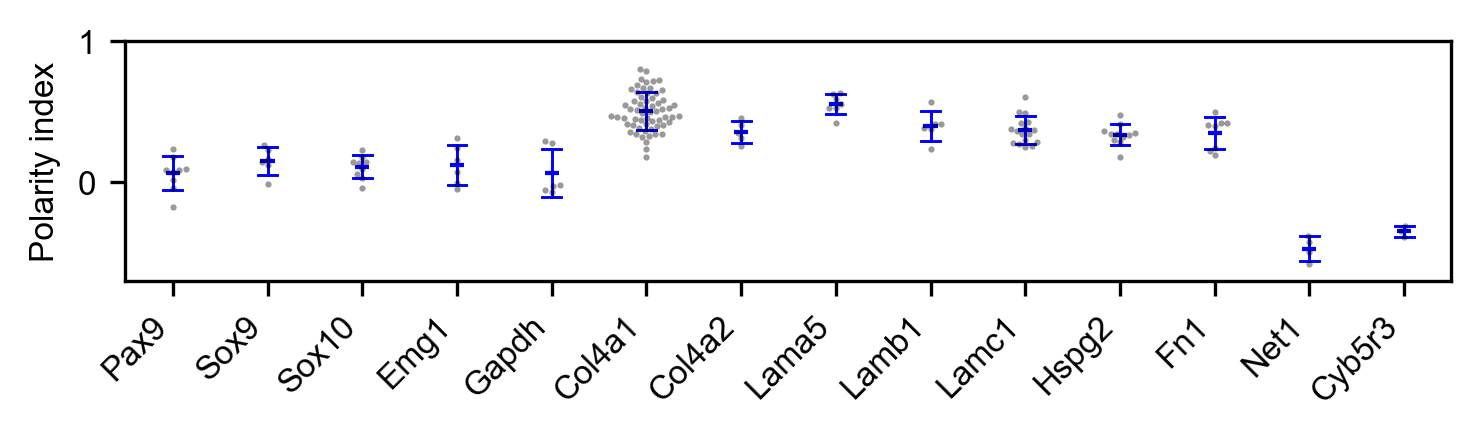

In [4]:
# Swarm plot of 4 categories

outputPrefix = 'Fig1-polarity-index-summary-swarm'
outputFigPath = "../jupyter_figures/" + outputPrefix + ".svg"

fig_width=5.2
fig_height=1.0
fig = plt.figure(figsize=(fig_width,fig_height), dpi=300)
ax = fig.add_axes([0.1, 0.1, 0.85, 0.8])

plotting_order = ['Pax9', 'Sox9', 'Sox10', 'Emg1', 'Gapdh',# 'Cdh1',
                  'Col4a1', 'Col4a2', 'Lama5', 'Lamb1', 'Lamc1', 'Hspg2', 'Fn1',# 'Tfrc',
                  'Net1', 'Cyb5r3']

ax = sns.swarmplot(x='gene', y='polarization_index', data=df,
                   order=plotting_order,
                   color='k',
                   alpha=.4,
                   size=1.5)

# ax = sns.barplot(x='gene', y='polarization_index', data=df,
#                  color=".7", alpha=1.0,
#                  errwidth=.7, errcolor=".7", capsize=.2, ci='sd')
# # make the bar width narrower
# change_bar_width(ax, .5)

ax = sns.pointplot(x='gene', y='polarization_index', data=df,
                   ci='sd', capsize=.2, errwidth=.7,
                   order=plotting_order,
                   markers='_', scale=.5, join=False, color="Blue")

plt.ylim(-0.7, 1.0)
# plt.yticks([0, 0.3, 0.6])

plt.xlabel(None)
plt.ylabel("Polarity index")

# rotate x tick labels
x_labels = ax.get_xticklabels()
ax.set_xticklabels(labels=x_labels, rotation=45, ha="right")

# # Remove legend (symbols representing orgnoids)
# ax.get_legend().remove()

for o in fig.findobj():
    o.set_clip_on(False)
for o in ax.findobj():
    o.set_clip_on(False)

if outputFigPath is not None:
    plt.savefig(outputFigPath)


In [5]:
tukeyTest(df.polarization_index, df.gene)

Summary of test:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
Col4a1 Col4a2  -0.1491   0.28 -0.3363  0.0381  False
Col4a1 Cyb5r3  -0.8537    0.0 -1.0916 -0.6157   True
Col4a1   Emg1  -0.3824    0.0 -0.5546 -0.2103   True
Col4a1    Fn1  -0.1557 0.0372  -0.307 -0.0044   True
Col4a1  Gapdh  -0.4366    0.0 -0.6087 -0.2644   True
Col4a1  Hspg2  -0.1683  0.002 -0.3001 -0.0364   True
Col4a1  Lama5   0.0481  0.999 -0.1125  0.2087  False
Col4a1  Lamb1  -0.1072  0.684 -0.2793   0.065  False
Col4a1  Lamc1  -0.1362 0.0034 -0.2465 -0.0258   True
Col4a1   Net1   -0.975    0.0 -1.1827 -0.7673   True
Col4a1   Pax9  -0.4424    0.0 -0.5861 -0.2987   True
Col4a1  Sox10  -0.3963    0.0   -0.54 -0.2526   True
Col4a1   Sox9  -0.3539    0.0 -0.5261 -0.1817   True
Col4a2 Cyb5r3  -0.7046    0.0 -0.9984 -0.4107   True
Col4a2   Emg1  -0.2333 0.0755  -0.477  0.0103  False
Col4a2    Fn1  -0.0066    1.